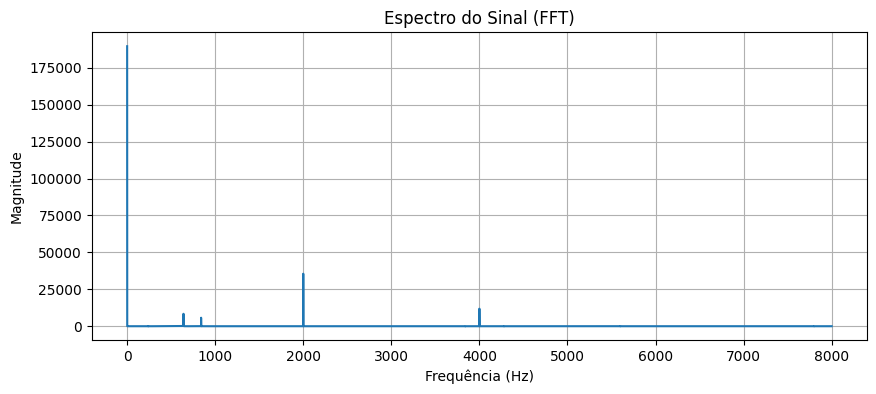

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import firwin, freqz

# Carregar o sinal
fs, x = wavfile.read('sinal_1.wav')  # fs = 16 kHz (taxa de amostragem)
x = x / np.max(np.abs(x))  # Normaliza o sinal

# FFT
N = len(x)
X = np.fft.fft(x)
freqs = np.fft.fftfreq(N, d=1/fs)[:N//2]  # Frequências positivas (0 a fs/2)

plt.figure(figsize=(10, 4))
plt.plot(freqs, np.abs(X[:N//2]))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
#plt.xlim([500, 1000])
plt.title('Espectro do Sinal (FFT)')
plt.grid(True)
plt.show()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6380\1253700768.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


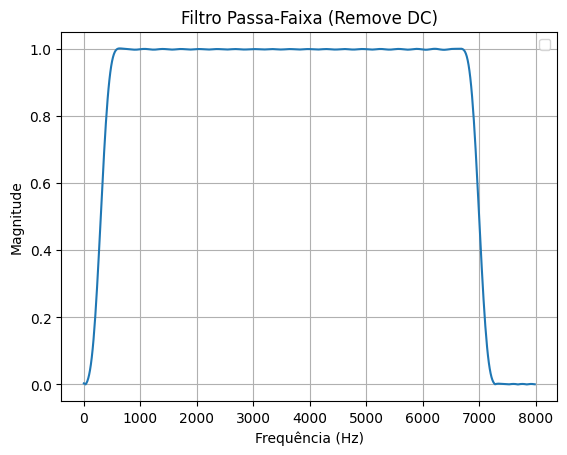

In [216]:
fs = 16000  # Taxa de amostragem
M = 100     # Ordem do filtro
f_low1, f_high1 = 300, 7000

# filtro passa-faixa FIR
h_highpass = firwin(M, [f_low1, f_high1], pass_zero=False, fs=fs)

w, H = freqz(h_highpass, fs=fs)
plt.plot(w, np.abs(H))
plt.title('Filtro Passa-Faixa (Remove DC)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()

In [217]:
#M = 101     # Ordem do filtro
#fc = 500
# Projeta um filtro passa-altas FIR
#h_highpass = firwin(M, fc, pass_zero=False, fs=fs)

# Resposta em frequência
#w, H = freqz(h_highpass, fs=fs)
#plt.plot(w, np.abs(H))#20 * np.log10(np.abs(H)))
#plt.title('Filtro Passa-Altas')
#plt.xlabel('Frequência (Hz)')
#plt.ylabel('Magnitude')
#plt.grid(True)
#plt.legend()
#plt.show()

<StemContainer object of 3 artists>

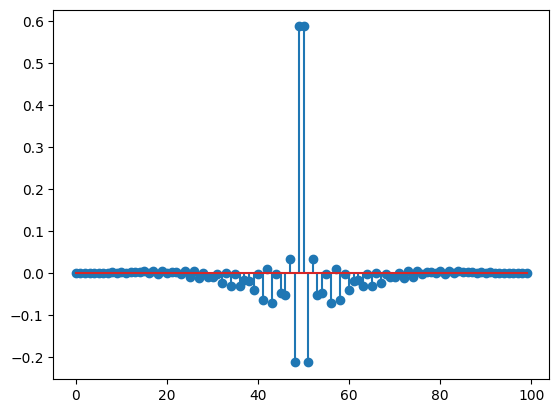

In [218]:
plt.stem(h_highpass)

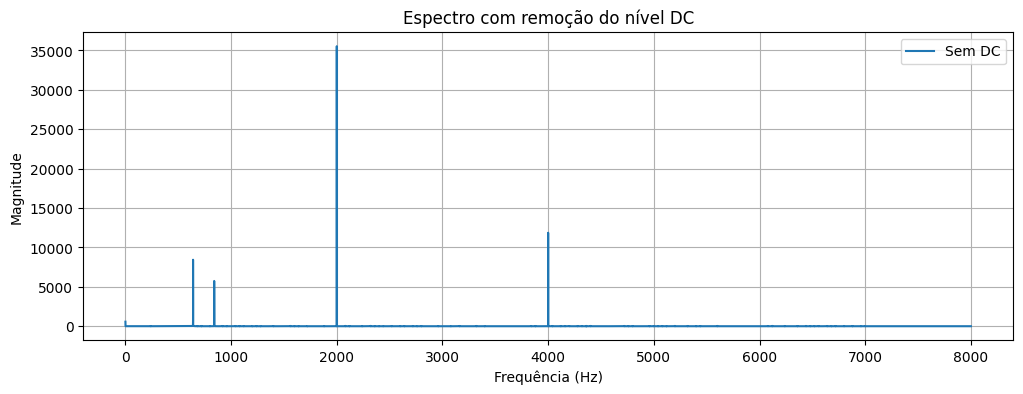

In [219]:
# Remove a componente DC
x_sem_dc = np.convolve(x, h_highpass, mode='same')

X_sem_dc = np.fft.fft(x_sem_dc)[:len(x_sem_dc)//2]

plt.figure(figsize=(12, 4))
plt.plot(freqs, np.abs(X_sem_dc), label='Sem DC')
plt.title('Espectro com remoção do nível DC')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

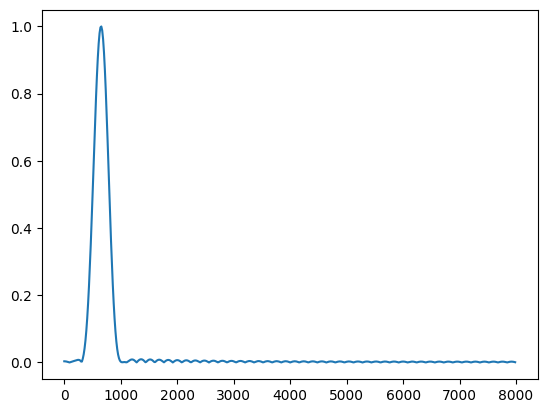

In [220]:
M=100
# Filtro para 640 Hz
f_low1, f_high1 = 600, 700
h1 = firwin(M, [f_low1, f_high1], pass_zero=False, fs=fs)

w1, H1 = freqz(h1, fs=fs)
plt.plot(w1, np.abs(H1), label='Filtro 640 Hz')

<StemContainer object of 3 artists>

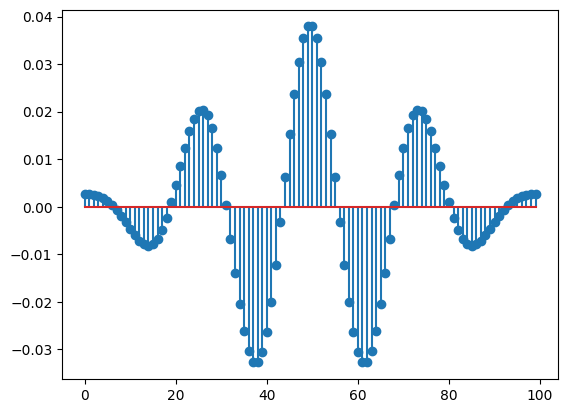

In [221]:
plt.stem(h1)

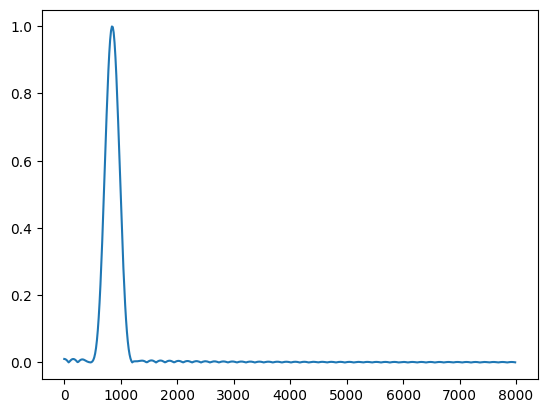

In [222]:
M=100
# Filtro para 840 Hz
f_low1, f_high1 = 800, 900
h2 = firwin(M, [f_low1, f_high1], pass_zero=False, fs=fs)

w1, H2 = freqz(h2, fs=fs)
plt.plot(w1, np.abs(H2), label='Filtro 840 Hz')

<StemContainer object of 3 artists>

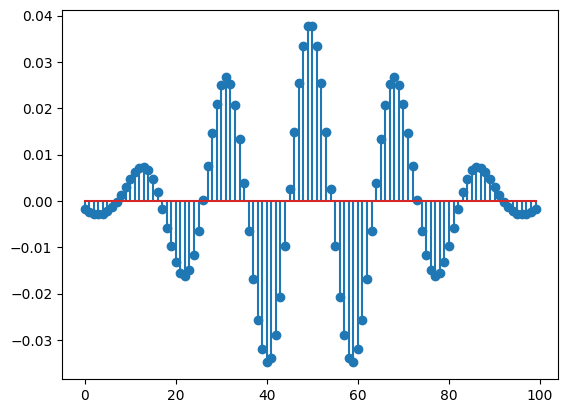

In [223]:
plt.stem(h2)

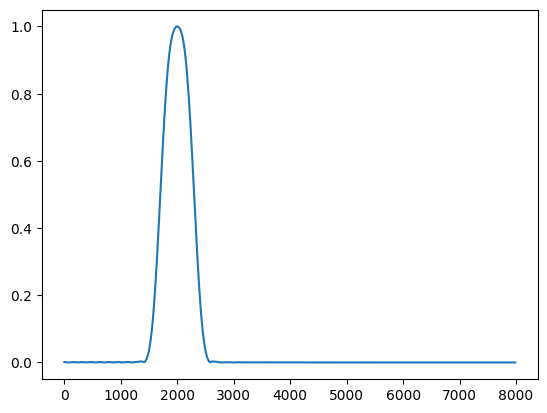

In [224]:
M=100
# Filtro para 2000 Hz
f_low1, f_high1 = 1700, 2300
h3 = firwin(M, [f_low1, f_high1], pass_zero=False, fs=fs)

w1, H3 = freqz(h3, fs=fs)
plt.plot(w1, np.abs(H3), label='Filtro 2000 Hz')

<StemContainer object of 3 artists>

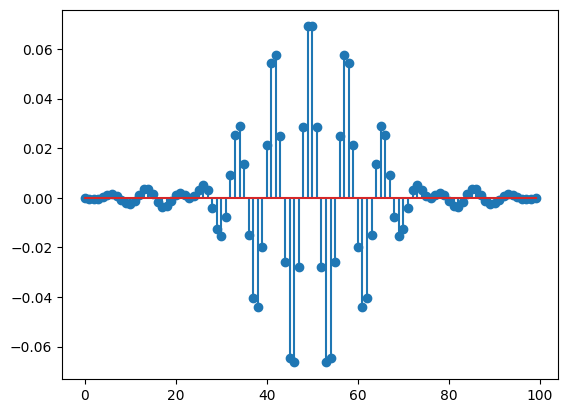

In [225]:
plt.stem(h3)

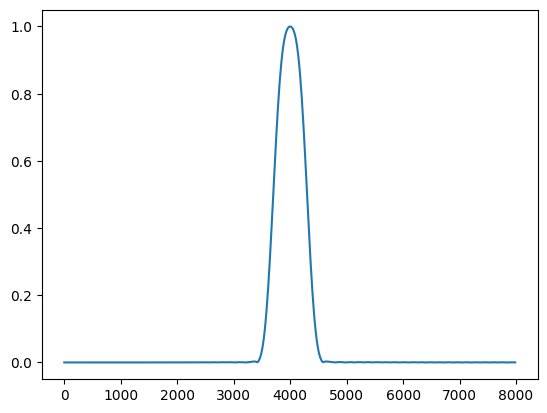

In [226]:
f_low2, f_high2 = 3700, 4300
h4 = firwin(M, [f_low2, f_high2], pass_zero=False, fs=fs)

w2, H4 = freqz(h4, fs=fs)
plt.plot(w2, np.abs(H4), label='Filtro 4000 Hz')

<StemContainer object of 3 artists>

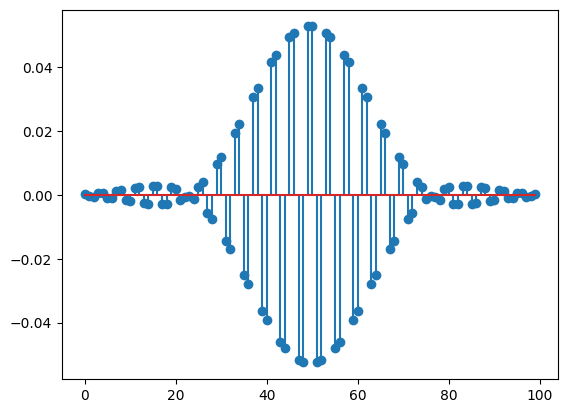

In [227]:
plt.stem(h4)

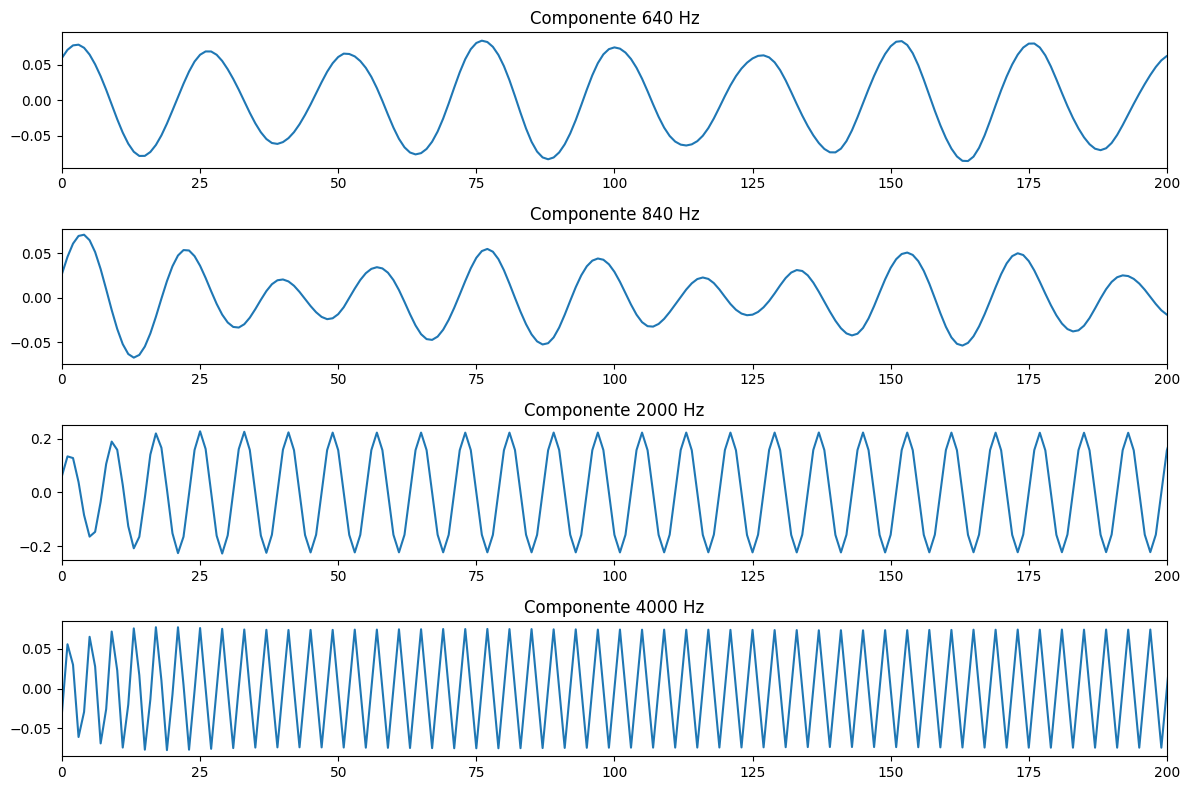

In [228]:
# Filtragem (convolução)
y1 = np.convolve(x_sem_dc, h1, mode='same')  
y2 = np.convolve(x_sem_dc, h2, mode='same') 
y3 = np.convolve(x_sem_dc, h3, mode='same') 
y4 = np.convolve(x_sem_dc, h4, mode='same') 

# Plot dos sinais separados
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(y1)
plt.title('Componente 640 Hz')
plt.xlim([0, 200])

plt.subplot(4, 1, 2)
plt.plot(y2)
plt.title('Componente 840 Hz')
plt.xlim([0, 200])

plt.subplot(4, 1, 3)
plt.plot(y3)
plt.title('Componente 2000 Hz')
plt.xlim([0, 200])

plt.subplot(4, 1, 4)
plt.plot(y4)
plt.title('Componente 4000 Hz')
plt.xlim([0, 200])

plt.tight_layout()
plt.show()